# Exloration der Daten

In diesem Notebook wollen wir einen Generator schaffen der die Bilder von der Festplatte lädt. Da wir relativ viele Bilder haben ist es nicht sinnvoll alle Bilder auf einmal in den Arbeitsspeicher zu laden.

Das trennen der Daten in Trainings- und Testset ist essentiell um die Performance des Modells zu testen. Dabei wird ein Teil der Daten während des Trainings zurück gehalten. Nur so lässt sich die "echte" Performance und Fähigkeit zu generalisieren des Modells auf ungesehenen Daten testen. Wenn wir auf demselben Set testen, wie wir trainieren, würden wir lediglich messen wie gut unser Modell Dinge auswendig lernen kann.

Im ersten Schritt importieren wir die notwendigen Packages und definieren einige Variablen 

Dabei wird Pylab benutzt um Bilder zu plotten, und der ImageDataGenerator von Keras um eine Datenpipeline zu bauen, welche Bilder von der Festplatte lädt.



In [0]:
import pylab as pl
from keras.preprocessing.image import ImageDataGenerator

TRAINSET = 'Cat_Dog_data/train'
TESTSET = 'Cat_Dog_data/test'

TARGET_SIZE = (150,150)
BATCH_SIZE = 16

Der ImageDataGenerator von Keras erwartet eine Ordnerstruktur wie folgt:

TARGET_DIR

  | - Klasse1

       | - Bild1_klasse1.png
       | - Bild2_klasse1.png
       | - Bild3_klasse1.png
  | - Klasse2

       | - Bild1_klasse2.png
       | - Bild2_klasse2.png
       | - Bild3_klasse2.png
       
       
Aus der Ordnerstruktur erzeugt der Generator automatisiert die Labels.       

In [0]:
# Laden der Daten data

image_datagen_train = ImageDataGenerator(rescale=1/255.0,
                                        rotation_range=5,
                                        horizontal_flip=0.5,
                                         brightness_range=(0.8,1.2))

image_flow_from_directory_train = image_datagen_train.flow_from_directory(TRAINSET,
                                                             target_size=TARGET_SIZE,
                                                             color_mode='rgb',
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='binary')

image_datagen_test = ImageDataGenerator(rescale=1/255.0)

image_flow_from_directory_test = image_datagen_test.flow_from_directory(TESTSET,
                                                             target_size=TARGET_SIZE,
                                                             color_mode='rgb',
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


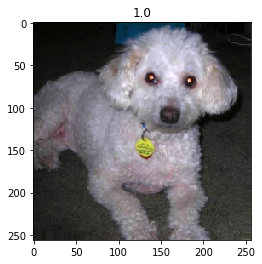

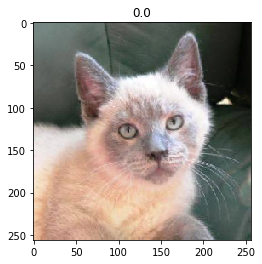

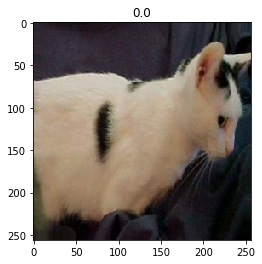

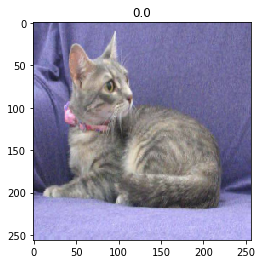

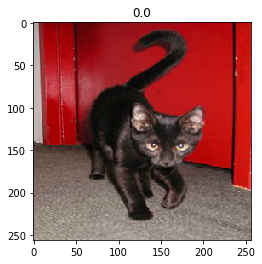

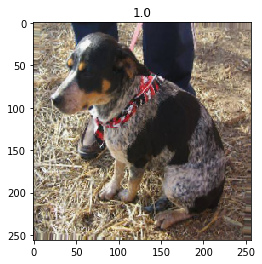

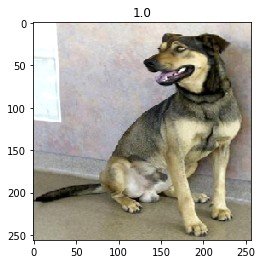

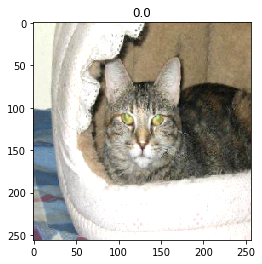

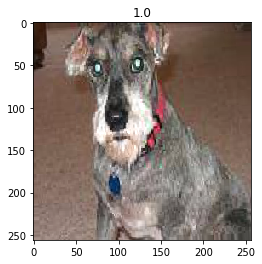

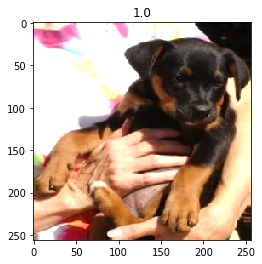

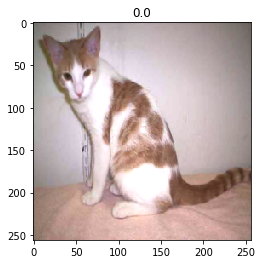

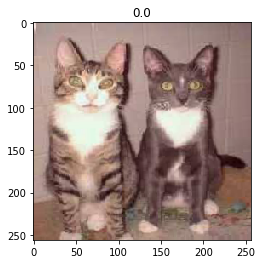

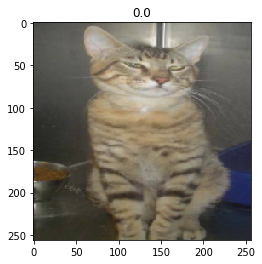

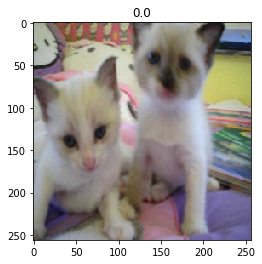

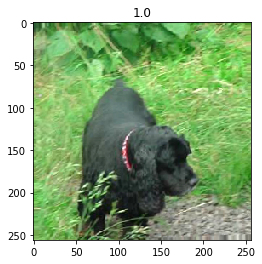

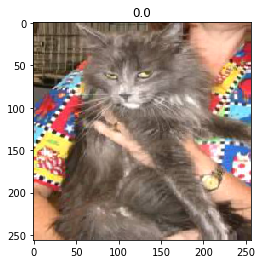

In [0]:
# testen des Batch Generators

batch = image_flow_from_directory_train.next()

batch[0].shape

for idx in range(batch[0].shape[0]):
  
  pl.figure()
  pl.imshow(batch[0][idx])
  pl.title(batch[1][idx])